# Fashion MNIST with SkLearn and Keras

Approach:-
1. Load the data and audit/visualize
2. Split the data
    - X and Y
    - Train and Test
3. Using SkLearn API
    - Single Layer Perceptron
    - Multi Layer Perceptron
4. Using Keras API
    - Model: Sequential/Functional
    - Layers: Dense Layer (Hidden Layers)
    - Compile the model (optimizers, loss, metrics)
    - Fit the model (input data, validation data, epochs/iterations, batch_size, verbose)
5. Save the model

In [8]:
!pip install tensorflow

     |████████████████████████████████| 497.6 MB 3.0 kB/s  eta 0:00:01     |███████████████████████████▋    | 430.0 MB 7.5 MB/s eta 0:00:10
     |████████████████████████████████| 462 kB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 8.3 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 1.4 MB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 7.9 MB/s eta 0:00:01
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from keras.losses import categorical_crossentropy

2022-04-25 14:29:54.854998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 14:29:54.855096: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train = pd.read_csv('archive/fashion-mnist_train.csv')
test = pd.read_csv('archive/fashion-mnist_test.csv')
print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (60000, 785)
Test shape (10000, 785)


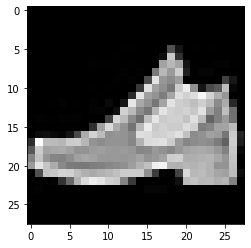

In [3]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1,785)]
row_to_examine = 1
image_data = np.reshape(train[features][row_to_examine: row_to_examine + 1].to_numpy(), (28,28))
plt.imshow(image_data, cmap="gray")

In [5]:
X = train.drop('label', axis=1)
y = train['label']
print('X shape', X.shape)
print('y shape', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X shape (60000, 784)
y shape (60000,)
X_train shape (48000, 784)
X_test shape (12000, 784)
y_train shape (48000,)
y_test shape (12000,)


## Sklearn implementation

In [6]:
mlp = MLPClassifier(hidden_layer_sizes = (32,32,32), verbose = True)

In [7]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.97338410
Iteration 2, loss = 0.88484387
Iteration 3, loss = 0.71454163
Iteration 4, loss = 0.63208697
Iteration 5, loss = 0.58560480
Iteration 6, loss = 0.55299731
Iteration 7, loss = 0.52147866
Iteration 8, loss = 0.50880551
Iteration 9, loss = 0.48849912
Iteration 10, loss = 0.47604222
Iteration 11, loss = 0.45798296
Iteration 12, loss = 0.45715278
Iteration 13, loss = 0.45058566
Iteration 14, loss = 0.43661602
Iteration 15, loss = 0.42515632
Iteration 16, loss = 0.41869205
Iteration 17, loss = 0.41338642
Iteration 18, loss = 0.40933760
Iteration 19, loss = 0.40276817
Iteration 20, loss = 0.39744053
Iteration 21, loss = 0.39116901
Iteration 22, loss = 0.38894379
Iteration 23, loss = 0.38659121
Iteration 24, loss = 0.38670718
Iteration 25, loss = 0.37740884
Iteration 26, loss = 0.37284102
Iteration 27, loss = 0.37008438
Iteration 28, loss = 0.36864463
Iteration 29, loss = 0.35998488
Iteration 30, loss = 0.35469119
Iteration 31, loss = 0.35387719
Iteration 32, los

/home/nvl/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 32, 32), verbose=True)

In [8]:
pred_mlp = mlp.predict(X_test)

In [9]:
def model_eval(actual, predicted):
    cm_mlp = confusion_matrix(actual, predicted)
    acc_score = accuracy_score(actual, predicted)
    class_report_mlp = classification_report(actual, predicted)
    print('Accuracy:', acc_score)
    print('\nConfusion Matrix:\n\n', cm_mlp)
    print('\nClassification Report:', class_report_mlp)

In [10]:
model_eval(y_test, pred_mlp)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

Accuracy: 0.8591666666666666

Confusion Matrix:

 [[ 993    2   20   24    3    2  137    0    8    0]
 [   6 1138    2   28    6    0    4    0    5    0]
 [  14    1  943   17  150    0   74    0    5    0]
 [  54    8    9 1094   63    0   28    0    4    0]
 [   1    0   78   48  998    0   81    0    2    0]
 [   2    1    3    1    2 1122    2   18    5   32]
 [ 182    5  121   23  142    0  710    0   12    0]
 [   0    0    0    0    0   31    0 1013    5  111]
 [   7    2    2    2   14    1   33    0 1143    6]
 [   0    0    0    0    1   18    0   21    1 1156]]

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1189
           1       0.98      0.96      0.97      1189
           2       0.80      0.78      0.79      1204
           3       0.88      0.87      0.88      1260
           4       0.72      0.83      0.77      1208
           5       0.96      0.94      0.95      1188
           6    

In [11]:
# List all the weights used in the model
print('Coefs/Weights:-\n\n',mlp.coefs_)
print('\n\n\n---------------------------------\n\n\n')
# List all the bias in the model
print('Bias:-\n\n',mlp.intercepts_)

Coefs/Weights:-

 [array([[-3.05798740e-315, -1.13123107e-119, -2.32758297e-315, ...,
        -3.11490292e-316, -5.23677263e-316, -8.01182548e-316],
       [ 4.64072605e-316, -2.15169013e-316,  2.74894241e-315, ...,
        -3.79784990e-315, -2.64145597e-316,  7.28834170e-152],
       [ 2.96939925e-316, -1.29768978e-008, -1.08563644e-315, ...,
         3.30424951e-315, -1.55680990e-003, -1.62002392e-002],
       ...,
       [ 1.47349127e-315,  1.93647189e-002, -3.08998802e-002, ...,
         2.31017611e-315, -2.97653349e-002,  1.80050360e-001],
       [ 4.62249367e-315, -1.00335040e-002, -3.10107142e-002, ...,
        -4.41693520e-315, -3.00191482e-002,  2.06174750e-001],
       [ 2.57372842e-315, -3.95252137e-113,  5.56581970e-051, ...,
        -9.74720537e-316,  7.38075709e-117,  1.22966459e-001]]), array([[ 1.60754927e-001,  8.71452636e-002,  1.51880356e-001, ...,
         1.41381304e-001, -9.87967019e-002,  1.03463885e-001],
       [-7.73263365e-003,  1.06057307e-128,  2.56459910e-

## Keras implementation

In [19]:
model = Sequential()
# activation function = 'relu' because pixels can't negative and relu take care of it, so any negative
# value will be round-off to 0
model.add(Dense(128, activation='relu', input_dim = 784))
# 0.2 --> 20% of neuron will be dropped off for ensuring no overfitting
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
# Adding 128 to every layer is the bias
# 128 * 784 + 128 = 100480 (Neruons in the 1st layer)
# 128 * 128 + 128 = 16512 (Neruons in the 3rd layer)
# 128 * 128 + 128 = 16512 (Neruons in the 5th layer)
# 10 * 128 + 128 = 16512 (Neruons in the 5th layer)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [20]:
y_train_transform = to_categorical(y_train)
y_test_transform = to_categorical(y_test)

In [21]:
print('y train transform', y_train_transform.shape)
print('y test transform', y_test_transform.shape)

y train transform (48000, 10)
y test transform (12000, 10)


In [22]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
hist = model.fit(X_train, y_train_transform, validation_data = (X_test, y_test_transform), batch_size = 64, epochs = 200, verbose = 2)

Epoch 1/200


2022-04-25 15:19:13.095795: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301056000 exceeds 10% of free system memory.


750/750 - 3s - loss: 2.0080 - accuracy: 0.5043 - val_loss: 0.7484 - val_accuracy: 0.7110 - 3s/epoch - 3ms/step
Epoch 2/200
750/750 - 2s - loss: 0.8706 - accuracy: 0.6666 - val_loss: 0.7143 - val_accuracy: 0.7135 - 2s/epoch - 2ms/step
Epoch 3/200
750/750 - 3s - loss: 0.7724 - accuracy: 0.6969 - val_loss: 0.6371 - val_accuracy: 0.7373 - 3s/epoch - 4ms/step
Epoch 4/200
750/750 - 3s - loss: 0.7137 - accuracy: 0.7086 - val_loss: 0.6247 - val_accuracy: 0.7388 - 3s/epoch - 4ms/step
Epoch 5/200
750/750 - 3s - loss: 0.6825 - accuracy: 0.7201 - val_loss: 0.5971 - val_accuracy: 0.7466 - 3s/epoch - 4ms/step
Epoch 6/200
750/750 - 2s - loss: 0.6649 - accuracy: 0.7258 - val_loss: 0.5825 - val_accuracy: 0.7527 - 2s/epoch - 3ms/step
Epoch 7/200
750/750 - 2s - loss: 0.6485 - accuracy: 0.7320 - val_loss: 0.5745 - val_accuracy: 0.7561 - 2s/epoch - 3ms/step
Epoch 8/200
750/750 - 2s - loss: 0.6456 - accuracy: 0.7353 - val_loss: 0.5868 - val_accuracy: 0.7580 - 2s/epoch - 3ms/step
Epoch 9/200
750/750 - 2s - l

Epoch 68/200
750/750 - 2s - loss: 0.5032 - accuracy: 0.8139 - val_loss: 0.4601 - val_accuracy: 0.8397 - 2s/epoch - 2ms/step
Epoch 69/200
750/750 - 2s - loss: 0.4899 - accuracy: 0.8201 - val_loss: 0.4666 - val_accuracy: 0.8371 - 2s/epoch - 2ms/step
Epoch 70/200
750/750 - 2s - loss: 0.5245 - accuracy: 0.7944 - val_loss: 0.5577 - val_accuracy: 0.7732 - 2s/epoch - 2ms/step
Epoch 71/200
750/750 - 2s - loss: 0.5659 - accuracy: 0.7691 - val_loss: 0.5343 - val_accuracy: 0.7787 - 2s/epoch - 2ms/step
Epoch 72/200
750/750 - 3s - loss: 0.5338 - accuracy: 0.7846 - val_loss: 0.5134 - val_accuracy: 0.8111 - 3s/epoch - 4ms/step
Epoch 73/200
750/750 - 3s - loss: 0.5180 - accuracy: 0.8025 - val_loss: 0.5058 - val_accuracy: 0.8252 - 3s/epoch - 4ms/step
Epoch 74/200
750/750 - 2s - loss: 0.5148 - accuracy: 0.8083 - val_loss: 0.4892 - val_accuracy: 0.8207 - 2s/epoch - 3ms/step
Epoch 75/200
750/750 - 2s - loss: 0.5157 - accuracy: 0.8087 - val_loss: 0.4859 - val_accuracy: 0.8363 - 2s/epoch - 3ms/step
Epoch 76

Epoch 134/200
750/750 - 3s - loss: 0.5012 - accuracy: 0.8000 - val_loss: 0.5152 - val_accuracy: 0.8075 - 3s/epoch - 4ms/step
Epoch 135/200
750/750 - 2s - loss: 0.5179 - accuracy: 0.7967 - val_loss: 0.4992 - val_accuracy: 0.8118 - 2s/epoch - 3ms/step
Epoch 136/200
750/750 - 2s - loss: 0.5150 - accuracy: 0.7977 - val_loss: 0.5112 - val_accuracy: 0.8155 - 2s/epoch - 2ms/step
Epoch 137/200
750/750 - 2s - loss: 0.4872 - accuracy: 0.8179 - val_loss: 0.5125 - val_accuracy: 0.8333 - 2s/epoch - 3ms/step
Epoch 138/200
750/750 - 2s - loss: 0.4851 - accuracy: 0.8201 - val_loss: 0.4727 - val_accuracy: 0.8301 - 2s/epoch - 2ms/step
Epoch 139/200
750/750 - 2s - loss: 0.4769 - accuracy: 0.8248 - val_loss: 0.5013 - val_accuracy: 0.8184 - 2s/epoch - 2ms/step
Epoch 140/200
750/750 - 2s - loss: 0.4744 - accuracy: 0.8237 - val_loss: 0.4578 - val_accuracy: 0.8391 - 2s/epoch - 3ms/step
Epoch 141/200
750/750 - 2s - loss: 0.4672 - accuracy: 0.8290 - val_loss: 0.5005 - val_accuracy: 0.8106 - 2s/epoch - 3ms/step


Epoch 200/200
750/750 - 2s - loss: 0.4732 - accuracy: 0.8240 - val_loss: 0.4845 - val_accuracy: 0.8311 - 2s/epoch - 3ms/step


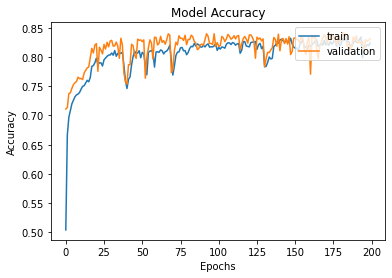

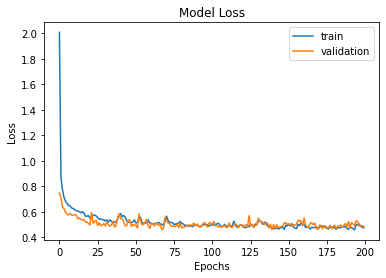

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# pred_seq = model.predict(X_test)
# model_eval(y_test_transform, pred_seq)

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [44]:
checkpoint_filepath = './content/checkpoint'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, 
                                            save_weights_only = True, 
                                            monitor = 'validation_accuracy', 
                                            mode = 'max', 
                                            save_best_only = True)

In [45]:
hist_1 = model.fit(X_train, y_train_transform, validation_data = (X_test, y_test_transform), batch_size = 64, epochs = 50, verbose = 2, callbacks=[model_checkpoint_callback])

Epoch 1/50


2022-04-24 17:13:52.577026: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301056000 exceeds 10% of free system memory.


750/750 - 3s - loss: 0.4955 - accuracy: 0.8110 - val_loss: 0.6323 - val_accuracy: 0.8136 - 3s/epoch - 3ms/step
Epoch 2/50
750/750 - 2s - loss: 0.5082 - accuracy: 0.8052 - val_loss: 0.6097 - val_accuracy: 0.8137 - 2s/epoch - 3ms/step
Epoch 3/50
750/750 - 2s - loss: 0.5120 - accuracy: 0.8016 - val_loss: 0.6285 - val_accuracy: 0.8169 - 2s/epoch - 3ms/step
Epoch 4/50
750/750 - 2s - loss: 0.5150 - accuracy: 0.8017 - val_loss: 0.6070 - val_accuracy: 0.8146 - 2s/epoch - 3ms/step
Epoch 5/50
750/750 - 3s - loss: 0.4920 - accuracy: 0.8114 - val_loss: 0.5806 - val_accuracy: 0.8187 - 3s/epoch - 4ms/step
Epoch 6/50
750/750 - 3s - loss: 0.5032 - accuracy: 0.8071 - val_loss: 0.6575 - val_accuracy: 0.8139 - 3s/epoch - 4ms/step
Epoch 7/50
750/750 - 2s - loss: 0.4937 - accuracy: 0.8083 - val_loss: 0.6618 - val_accuracy: 0.8179 - 2s/epoch - 3ms/step
Epoch 8/50
750/750 - 2s - loss: 0.4911 - accuracy: 0.8105 - val_loss: 0.7066 - val_accuracy: 0.8141 - 2s/epoch - 3ms/step
Epoch 9/50
750/750 - 2s - loss: 0.5

Epoch 40/50
750/750 - 2s - loss: 0.4779 - accuracy: 0.8086 - val_loss: 0.6736 - val_accuracy: 0.7807 - 2s/epoch - 3ms/step
Epoch 41/50
750/750 - 2s - loss: 0.5037 - accuracy: 0.8074 - val_loss: 0.6682 - val_accuracy: 0.8185 - 2s/epoch - 3ms/step
Epoch 42/50
750/750 - 2s - loss: 0.4928 - accuracy: 0.8118 - val_loss: 0.6694 - val_accuracy: 0.8169 - 2s/epoch - 3ms/step
Epoch 43/50
750/750 - 2s - loss: 0.4832 - accuracy: 0.8117 - val_loss: 0.6762 - val_accuracy: 0.8136 - 2s/epoch - 3ms/step
Epoch 44/50
750/750 - 2s - loss: 0.5031 - accuracy: 0.8065 - val_loss: 0.6021 - val_accuracy: 0.8242 - 2s/epoch - 3ms/step
Epoch 45/50
750/750 - 2s - loss: 0.4770 - accuracy: 0.8142 - val_loss: 0.6313 - val_accuracy: 0.8192 - 2s/epoch - 3ms/step
Epoch 46/50
750/750 - 2s - loss: 0.5076 - accuracy: 0.8036 - val_loss: 0.6378 - val_accuracy: 0.8177 - 2s/epoch - 3ms/step
Epoch 47/50
750/750 - 2s - loss: 0.5005 - accuracy: 0.8090 - val_loss: 0.6252 - val_accuracy: 0.8235 - 2s/epoch - 3ms/step
Epoch 48/50
750/